# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Обзор данных

In [1]:
#Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn
#Снимаем ограничение с количества показанных столбцов
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
#Чтение файла в переменную
try:
    df = pd.read_csv('real_estate_data.csv', sep='\t')  # Локальный путь
except:
    df = pd.read_csv('/datasets/data.csv', sep='\t')  # Серверный путь

In [3]:
# Изучим данные
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,nan,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,nan
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,nan,0.00,nan,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,NaN,False,False,nan,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,nan,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


In [4]:
# Сразу перемеинуем колонку cityCenters_nearest
df=df.rename(columns= {'cityCenters_nearest': 'city_centers_nearest'})

**Описание данных**
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

In [5]:
# Размер таблицы
df.shape

(23699, 22)

In [6]:
# Изуим информацию о типах данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
city_centers_nearest    18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [7]:
# Количество пропусков
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
# Процент пропусков от общего количества
df.isna().mean()

total_images           0.00
last_price             0.00
total_area             0.00
first_day_exposition   0.00
rooms                  0.00
ceiling_height         0.39
floors_total           0.00
living_area            0.08
floor                  0.00
is_apartment           0.88
studio                 0.00
open_plan              0.00
kitchen_area           0.10
balcony                0.49
locality_name          0.00
airports_nearest       0.23
city_centers_nearest   0.23
parks_around3000       0.23
parks_nearest          0.66
ponds_around3000       0.23
ponds_nearest          0.62
days_exposition        0.13
dtype: float64

### Вывод

Импортировали библиотеки, открыли и изучили данные.

Имеются следующие проблемы:

- есть столбцы с пропусками
- типы данных можно оптимизировать
- верблюжий столбец(исправлено)


## Предобработка данных

В данном разделе, подробно рассмотрим данные, попробуем заполнить пропуски, выявим и удалим дубликаты, сразу будем изменять тип данных, где это возможно.

**locality_name**              

In [9]:
df[df['locality_name'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.00,81.70,2016-04-15T00:00:00,3,3.55,5.00,50.80,2,NaN,False,False,8.80,0.00,NaN,23478.00,4258.00,0.00,nan,0.00,nan,147.00
2033,6,5398000.00,80.00,2017-05-30T00:00:00,3,nan,4.00,42.60,2,NaN,False,False,18.60,0.00,NaN,nan,nan,nan,nan,nan,nan,34.00
2603,20,3351765.00,42.70,2015-09-20T00:00:00,1,nan,24.00,15.60,3,NaN,False,False,10.70,0.00,NaN,22041.00,17369.00,0.00,nan,1.00,374.00,276.00
2632,2,5130593.00,62.40,2015-10-11T00:00:00,2,nan,24.00,33.10,21,NaN,False,False,8.20,0.00,NaN,22041.00,17369.00,0.00,nan,1.00,374.00,256.00
3574,10,4200000.00,46.50,2016-05-28T00:00:00,2,nan,5.00,30.80,5,NaN,False,False,6.50,0.00,NaN,27419.00,8127.00,0.00,nan,1.00,603.00,45.00
4151,17,17600000.00,89.50,2014-12-09T00:00:00,2,3.00,8.00,39.62,7,NaN,False,False,13.38,0.00,NaN,25054.00,3902.00,1.00,485.00,3.00,722.00,869.00
4189,7,9200000.00,80.00,2015-12-10T00:00:00,3,4.00,4.00,52.30,3,False,False,False,10.40,0.00,NaN,21774.00,3039.00,1.00,690.00,1.00,953.00,223.00
4670,1,5500000.00,83.00,2015-08-14T00:00:00,3,nan,7.00,nan,6,NaN,False,False,nan,0.00,NaN,26534.00,5382.00,1.00,446.00,1.00,376.00,350.00
5343,19,13540000.00,85.50,2016-01-20T00:00:00,3,nan,7.00,59.10,5,False,False,False,8.30,4.00,NaN,10556.00,9538.00,1.00,67.00,0.00,nan,303.00
5707,7,3700000.00,30.00,2016-04-29T00:00:00,1,nan,24.00,20.00,23,NaN,False,False,nan,0.00,NaN,21460.00,16788.00,0.00,nan,1.00,170.00,49.00


In [10]:
# Количество уникальных локаций
len(df['locality_name'].unique())

365

In [11]:
# Заменим буквы ё в названии локации
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex=True)

In [12]:
len(df['locality_name'].unique())

331

In [13]:
# Выявим пропуски в названиях
df['locality_name'].isna().sum()            

49

In [14]:
# Удалим 49 объявлений без населенного понкта
df = df.dropna(subset=['locality_name'])

In [15]:
df['locality_name'].isna().sum()     

0

**total_area**             

In [16]:
# Округлим и поменяем тип данных
df['total_area']=df['total_area'].round().astype('Int64')
df['total_area'].describe()

count   23650.00
mean       60.32
std        35.67
min        12.00
25%        40.00
50%        52.00
75%        70.00
max       900.00
Name: total_area, dtype: float64

**living_area**

In [17]:
df['living_area'].isna().sum()

1898

In [18]:
df['living_area'].describe()

count   21752.00
mean       34.45
std        22.04
min         2.00
25%        18.60
50%        30.00
75%        42.30
max       409.70
Name: living_area, dtype: float64

In [19]:
# Соотношение жилой площади к общей
(df['living_area'] / df['total_area']).median()

0.5681818181818182

In [20]:
# Заполним пропуски используя общую площадь и медианное значение соотношения жилой площади к общей
df['living_area']=df['living_area'].fillna(df['total_area']*((df['living_area'] / df['total_area']).median()))
df['living_area']=df['living_area'].astype('int')

In [21]:
df['living_area'].isna().sum()

0

In [22]:
# Значения изменились незначительно, считаю данный способ заполнения верным.
df['living_area'].describe()

count   23650.00
mean       34.30
std        22.35
min         2.00
25%        19.00
50%        30.00
75%        42.00
max       409.00
Name: living_area, dtype: float64

**kitchen_area**            

Делаем по аналогии с  living_area

In [23]:
(df['kitchen_area'] / df['total_area']).median()

0.1724137931034483

In [24]:
df['kitchen_area'].isna().sum()

2269

In [25]:
df['kitchen_area'].describe()

count   21381.00
mean       10.57
std         5.90
min         1.30
25%         7.00
50%         9.10
75%        12.00
max       112.00
Name: kitchen_area, dtype: float64

In [26]:
df['kitchen_area']=df['kitchen_area'].fillna(df['total_area']*((df['kitchen_area'] / df['total_area']).median()))
df['kitchen_area']=df['kitchen_area'].astype('int')

In [27]:
df['kitchen_area'].isna().sum()

0

In [28]:
df['kitchen_area'].describe()

count   23650.00
mean       10.22
std         6.04
min         1.00
25%         7.00
50%         9.00
75%        12.00
max       112.00
Name: kitchen_area, dtype: float64

**is_apartment**

In [29]:
df['is_apartment'].value_counts()

False    2710
True       50
Name: is_apartment, dtype: int64

In [30]:
# Специфическое свойство недвижимости, думаю, что отсутствие значеня, означает, что квартра обычная, заменим знаения нулем
df['is_apartment']=df['is_apartment'].fillna(0)
df['is_apartment']=df['is_apartment'].astype('bool')

In [31]:
df['is_apartment'].value_counts()

False    23600
True        50
Name: is_apartment, dtype: int64

**balcony**

In [32]:
df['balcony'].value_counts()

1.00    4187
0.00    3725
2.00    3658
5.00     304
4.00     182
3.00      81
Name: balcony, dtype: int64

In [33]:
df['balcony'].isna().sum()

11513

In [34]:
# Заменим пропуски нулем, был бы балкон, он был бы указан.
df['balcony']=df['balcony'].fillna(0)
df['balcony']=df['balcony'].astype('int')

**rooms**

In [35]:
df['rooms'].value_counts()

1     8036
2     7924
3     5797
4     1175
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

In [36]:
# Хоть одна комната, но должна быть
df.loc[df['rooms'] == 0, 'rooms'] = 1

In [37]:
df['rooms'].value_counts()

1     8233
2     7924
3     5797
4     1175
5      326
6      105
7       59
8       12
9        8
10       3
14       2
11       2
15       1
12       1
19       1
16       1
Name: rooms, dtype: int64

**floors_total**

In [38]:
df['floors_total'].isna().sum()

85

In [39]:
df['floors_total'].describe()

count   23565.00
mean       10.68
std         6.59
min         1.00
25%         5.00
50%         9.00
75%        16.00
max        60.00
Name: floors_total, dtype: float64

In [40]:
# Количество этажей в доме важно, для группировки по этажам, обычно указывают 1 и последний этаж
# Чтобы квартира не попала в "особый" список сделаем таким образом
df['floors_total']=df['floors_total'].fillna(df['floor']+1)
df['floors_total']=df['floors_total'].astype('int')

**ceiling_height**

In [41]:
df['ceiling_height'].isna().sum()

9160

In [42]:
df['ceiling_height'].median()

2.65

In [43]:
# Спорный вопрос, высота потолков стандартизирована и зависит от года постройки и стандартов, в данной работе, заполню медианой.
df['ceiling_height']=df['ceiling_height'].fillna(df['ceiling_height'].median())

In [44]:
df['ceiling_height'].isna().sum()

0

**city_centers_nearest**

In [45]:
df['city_centers_nearest'].describe()

count   18139.00
mean    14197.86
std      8606.83
min       181.00
25%      9241.00
50%     13105.00
75%     16293.00
max     65968.00
Name: city_centers_nearest, dtype: float64

In [46]:
# Очень много пропусков
df['city_centers_nearest'].isna().sum()

5511

In [47]:
# Сгруппируем по локации и присвоим медианное расстояние по группе
df['city_centers_nearest']=df['city_centers_nearest'].fillna(df.groupby('locality_name')['city_centers_nearest'].transform('median'))

In [48]:
# Удалось заполнить часть пропусков
df['city_centers_nearest'].isna().sum()

4864

Очень много локаций без расстояния, посмотрим подробнее

In [49]:
(df.groupby('locality_name')['city_centers_nearest'].median()).isna().sum()

303

In [50]:
(df.groupby('locality_name')['city_centers_nearest'].median()).head(20)

locality_name
Бокситогорск         nan
Волосово             nan
Волхов               nan
Всеволожск           nan
Выборг               nan
Высоцк               nan
Гатчина              nan
Зеленогорск     53381.00
Ивангород            nan
Каменногорск         nan
Кингисепп            nan
Кириши               nan
Кировск              nan
Колпино         32018.00
Коммунар             nan
Красное Село    29140.50
Кронштадт       49575.00
Кудрово              nan
Лодейное Поле        nan
Ломоносов       51677.00
Name: city_centers_nearest, dtype: float64

In [51]:
df.query('locality_name == "Волосово" or locality_name=="Кировск" ').head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
76,12,2800000.00,55,2016-05-14T00:00:00,3,2.60,5,38,1,False,False,False,4,0,Кировск,nan,nan,nan,nan,nan,nan,606.00
79,12,2590000.00,56,2017-12-18T00:00:00,3,2.50,4,42,4,False,False,False,7,0,Кировск,nan,nan,nan,nan,nan,nan,463.00
84,11,2400000.00,44,2019-03-13T00:00:00,2,2.65,2,27,1,False,False,False,5,0,Кировск,nan,nan,nan,nan,nan,nan,nan
292,10,3400000.00,61,2016-03-11T00:00:00,2,2.50,9,32,6,False,False,False,14,2,Кировск,nan,nan,nan,nan,nan,nan,334.00
386,6,2370000.00,40,2018-03-06T00:00:00,1,2.65,5,23,2,False,False,False,9,2,Кировск,nan,nan,nan,nan,nan,nan,106.00
432,12,1490000.00,36,2018-09-10T00:00:00,1,2.50,5,17,3,False,False,False,8,2,Волосово,nan,nan,nan,nan,nan,nan,23.00
503,11,2850000.00,72,2018-02-27T00:00:00,3,2.65,5,42,2,False,False,False,8,0,Волосово,nan,nan,nan,nan,nan,nan,74.00
518,6,2720000.00,53,2015-07-30T00:00:00,2,2.50,5,28,5,False,False,False,8,0,Кировск,nan,nan,nan,nan,nan,nan,613.00
650,4,1750000.00,58,2016-02-02T00:00:00,3,2.60,4,41,1,False,False,False,6,0,Волосово,nan,nan,nan,nan,nan,nan,605.00
918,17,2900000.00,59,2015-11-10T00:00:00,3,2.50,5,40,4,False,False,False,5,2,Кировск,nan,nan,nan,nan,nan,nan,864.00


По всей видимости, для части локаций не подгрузилась информация по расстояниям, этот вопрос требует доработки с заказчиком

In [52]:
# Переведем метры в километры, округлим и поменяем тип данных
round_astype=['city_centers_nearest','airports_nearest', 'ponds_nearest','parks_nearest']
for i in round_astype:
    df[i]=(df[i]/1000).round().astype('Int64')


In [53]:
# Приведем дату в нормальный вид
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")

In [54]:
df.duplicated().sum()

0

In [55]:
df.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
16059,0,3800000.00,32,2017-09-13,1,2.65,12,18,2,False,False,False,5,2,Санкт-Петербург,51,15,1.00,0,0.00,NaN,46.00
4871,9,3700000.00,33,2017-10-10,1,2.65,5,18,4,False,False,False,6,0,Санкт-Петербург,51,12,2.00,0,1.00,0,129.00
20785,9,6325000.00,56,2015-10-26,2,3.27,5,35,1,False,False,False,8,0,Санкт-Петербург,32,5,2.00,0,3.00,0,234.00
4852,12,3999000.00,78,2018-09-12,4,2.65,9,44,1,False,False,False,9,0,Выборг,NaN,NaN,nan,NaN,nan,NaN,215.00
15217,10,2850000.00,31,2018-09-06,1,2.70,19,15,15,False,False,False,9,0,поселок Мурино,NaN,22,nan,NaN,nan,NaN,62.00
58,11,3900000.00,33,2017-07-05,1,2.60,9,19,5,False,False,False,7,0,Санкт-Петербург,13,16,0.00,NaN,2.00,1,298.00
1261,13,2550000.00,45,2017-11-10,2,2.65,5,32,4,False,False,False,6,1,Выборг,NaN,NaN,nan,NaN,nan,NaN,152.00
3319,13,4400000.00,39,2018-01-11,1,2.65,24,22,23,False,False,False,6,0,Санкт-Петербург,44,9,0.00,NaN,0.00,NaN,45.00
1308,3,8990000.00,113,2017-11-17,4,2.65,5,77,3,False,False,False,11,0,Санкт-Петербург,24,4,1.00,0,0.00,NaN,17.00
16133,1,3570000.00,45,2017-03-24,2,2.65,5,31,3,False,False,False,6,1,Санкт-Петербург,13,15,1.00,1,1.00,1,180.00


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null Int64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null int32
living_area             23650 non-null int32
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null int32
balcony                 23650 non-null int32
locality_name           23650 non-null object
airports_nearest        18116 non-null Int64
city_centers_nearest    18786 non-null Int64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null Int64
ponds_around3000        

### Вывод
В данном разделе были частично заполнены пропуски, изменены типы данных.


## Расчёты и добавление результатов в таблицу

In [57]:
# Функция для группировки по этажам
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
df['floor_group'] = df.apply(floor_group, axis=1)

In [58]:
# Добавим соотношение жилой и общей площади, а также отношение площади кухни к общей
df['living_area_ratio'] = df['living_area'] / df['total_area']
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']

In [59]:
# Добавим день недели, месяц и год публикации объявления
df['year'] = df['first_day_exposition'].dt.year
df['month'] = df['first_day_exposition'].dt.month_name()
df['day'] = df['first_day_exposition'].dt.day_name()

In [60]:
# Добавим цену квадратного метра
df['price_per_meter']=(df['last_price']/df['total_area']).astype('int')

In [61]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floor_group,living_area_ratio,kitchen_area_ratio,year,month,day,price_per_meter
0,20,13000000.00,108,2019-03-07,3,2.70,16,51,8,False,False,False,25,0,Санкт-Петербург,19,16,1.00,0,2.00,1,nan,другой,0.47,0.23,2019,March,Thursday,120370
1,7,3350000.00,40,2018-12-04,1,2.65,11,18,1,False,False,False,11,2,поселок Шушары,13,19,0.00,NaN,0.00,NaN,81.00,первый,0.45,0.28,2018,December,Tuesday,83750
2,10,5196000.00,56,2015-08-20,2,2.65,5,34,4,False,False,False,8,0,Санкт-Петербург,22,14,1.00,0,2.00,1,558.00,другой,0.61,0.14,2015,August,Thursday,92785
3,0,64900000.00,159,2015-07-24,3,2.65,14,90,9,False,False,False,27,0,Санкт-Петербург,28,7,2.00,0,3.00,0,424.00,другой,0.57,0.17,2015,July,Friday,408176
4,2,10000000.00,100,2018-06-19,2,3.03,14,32,13,False,False,False,41,0,Санкт-Петербург,32,8,2.00,0,1.00,0,121.00,другой,0.32,0.41,2018,June,Tuesday,100000


In [62]:
df['last_price']=df['last_price'].round().astype('Int64')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 29 columns):
total_images            23650 non-null int64
last_price              23650 non-null Int64
total_area              23650 non-null Int64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null int32
living_area             23650 non-null int32
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null int32
balcony                 23650 non-null int32
locality_name           23650 non-null object
airports_nearest        18116 non-null Int64
city_centers_nearest    18786 non-null Int64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null Int64
ponds_around3000        18

### Вывод

- Написали и приминили функцию для категоризации по этажу
- Добавили соотношение жилой и общей площади, а также отношение площади кухни к общей
- Добавим столбцы: день недели, месяц и год публикации объявления
- Добавили цену квадратного метра

## Исследовательский анализ данных

### Площадь, цена, число комнат, высота потолков

Построим гистограммы для каждого параметра.

#### Общая площадь

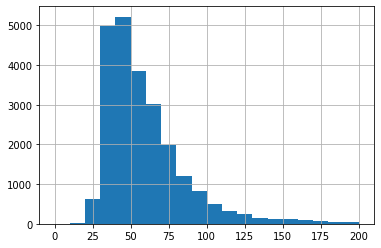

In [64]:
df['total_area'].hist(bins=20, range=(0,200));

count   23650.00
mean       60.32
std        35.67
min        12.00
25%        40.00
50%        52.00
75%        70.00
max       900.00
Name: total_area, dtype: float64

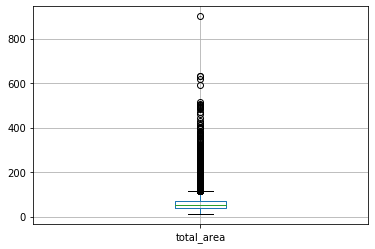

In [65]:

df.boxplot(['total_area']) 
df['total_area'].describe()

Данные имеют выбросы и требуют фильтрации. Есть аномально большие площади и маленькие.

#### Цена

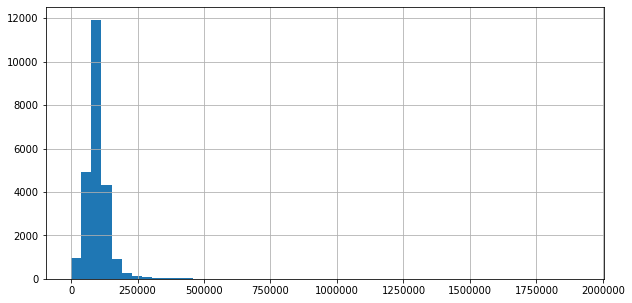

In [66]:
df['price_per_meter'].hist(bins=50,figsize=(10, 5));

count     23650.00
mean      99450.97
std       50340.12
min         111.00
25%       76562.00
50%       95000.00
75%      114285.00
max     1907500.00
Name: price_per_meter, dtype: float64

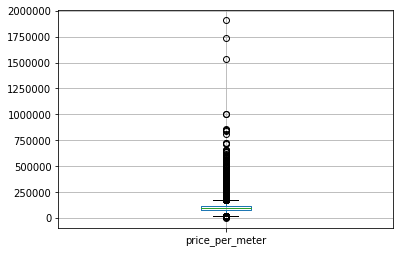

In [67]:

df.boxplot(['price_per_meter']) 
df['price_per_meter'].describe()

Колоссальный разброс по цене, есть непрелично высокие.

#### Количество комнат

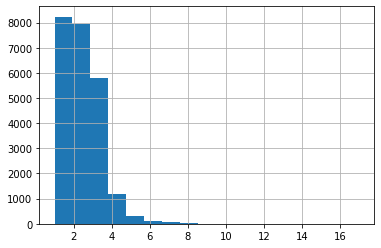

In [68]:

df['rooms'].hist(bins=17, range=(1,17));

count   23650.00
mean        2.08
std         1.07
min         1.00
25%         1.00
50%         2.00
75%         3.00
max        19.00
Name: rooms, dtype: float64

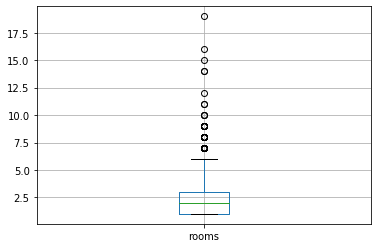

In [69]:

df.boxplot(['rooms'])
df['rooms'].describe()

С количеством комнат есть явный перебор

#### Высота потолков

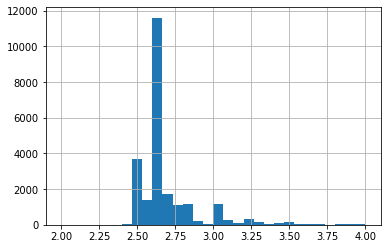

In [70]:
df['ceiling_height'].hist(bins=30, range=(2,4));

count   23650.00
mean        2.72
std         0.99
min         1.00
25%         2.60
50%         2.65
75%         2.70
max       100.00
Name: ceiling_height, dtype: float64

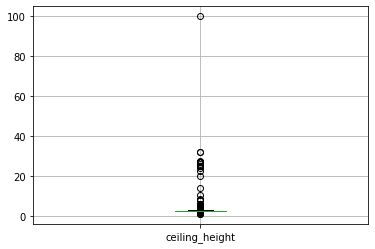

In [71]:

df.boxplot(['ceiling_height'])
df['ceiling_height'].describe()

С высотой потолка вообще боль, но основная масса понятна, 2,65, нормальная высота

### Время продажи квартиры


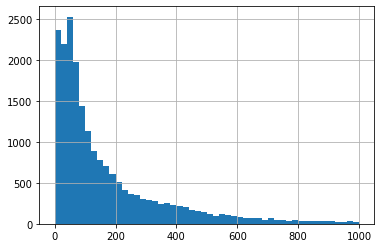

In [72]:
df['days_exposition'].hist(bins=50, range=(0,1000));

Есть мнгновенные продажи, есть и более 3 лет

count   20470.00
mean      180.75
std       219.78
min         1.00
25%        45.00
50%        95.00
75%       231.00
max      1580.00
Name: days_exposition, dtype: float64

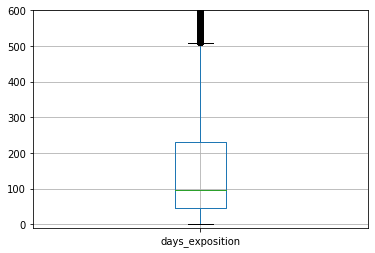

In [73]:

plt.ylim(-10,600)
df.boxplot(['days_exposition'])
df['days_exposition'].describe()


In [74]:
len(df.query('days_exposition<=365'))/len(df)

0.7365327695560254

Коробка и дескрайб показывает что медианное время продажи 100 дней, а основные продажи происходят от 45 до 230 дней

Среднне время 180 дней

73% квартир продаются в течении года

Если продажи уложились в этот диапазон, считаю что продажи прошли успешно

Продажи более года считаю сомнительными

### Уберем редкие и выбивающиеся значения.

Подберем параметры для управления выборкой, это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

Будем использовать следующие параметры:
- Площадь квартиры
- цена за метр
- количество комнат
- высота потолков

In [75]:
# Параметры
total_area_parameters=100
price_per_meter_parameters_min=25000
price_per_meter_parameters_max=165000
rooms_parameters=5
ceiling_height_min_parameters=2.5
ceiling_height_max_parameters=3
# Делаем выборку с учетом параметров
good_df = df.query('total_area<@total_area_parameters and price_per_meter>=@price_per_meter_parameters_min and rooms<=@rooms_parameters and ceiling_height>=@ceiling_height_min_parameters and ceiling_height<=@ceiling_height_max_parameters and @price_per_meter_parameters_max>=price_per_meter')
         

In [76]:
# Количество сомнительных объявлений
len(df)-len(good_df)

3675

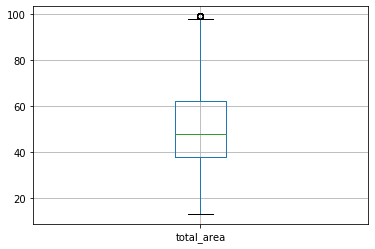

In [77]:
good_df.boxplot(['total_area']);

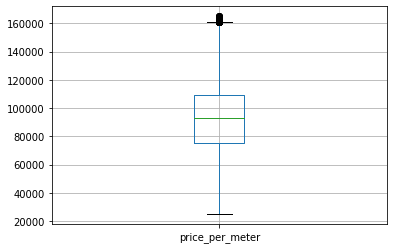

In [78]:
good_df.boxplot(['price_per_meter']);

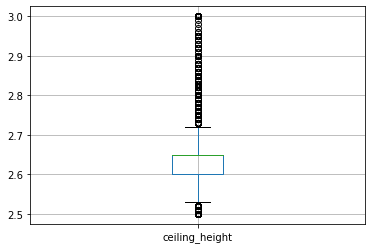

In [79]:
good_df.boxplot(['ceiling_height']);

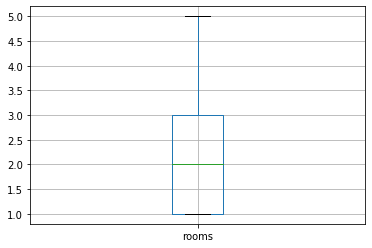

In [80]:
good_df.boxplot(['rooms']);

Данные вылетают чуть дальше усов, кроме высоты потолка, считаю, что 3м нормальная высота, если что, всегда можно изменить параметры

### Изучим факторы влияющие на цену.

In [111]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floor_group,living_area_ratio,kitchen_area_ratio,year,month,day,price_per_meter
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,False,False,False,25,0,Санкт-Петербург,19,16,1.00,0,2.00,1,nan,другой,0.47,0.23,2019,March,Thursday,120370
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,False,False,False,11,2,поселок Шушары,13,19,0.00,NaN,0.00,NaN,81.00,первый,0.45,0.28,2018,December,Tuesday,83750
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,False,False,False,8,0,Санкт-Петербург,22,14,1.00,0,2.00,1,558.00,другой,0.61,0.14,2015,August,Thursday,92785
3,0,64900000,159,2015-07-24,3,2.65,14,90,9,False,False,False,27,0,Санкт-Петербург,28,7,2.00,0,3.00,0,424.00,другой,0.57,0.17,2015,July,Friday,408176
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,False,False,False,41,0,Санкт-Петербург,32,8,2.00,0,1.00,0,121.00,другой,0.32,0.41,2018,June,Tuesday,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,134,2017-03-21,3,3.70,5,73,3,False,False,False,13,0,Санкт-Петербург,25,4,1.00,1,3.00,0,nan,другой,0.54,0.10,2017,March,Tuesday,72388
23695,14,3100000,59,2018-01-15,3,2.65,5,38,4,False,False,False,8,0,Тосно,NaN,NaN,nan,NaN,nan,NaN,45.00,другой,0.64,0.14,2018,January,Monday,52542
23696,18,2500000,57,2018-02-11,2,2.65,3,29,1,False,False,False,9,0,село Рождествено,NaN,NaN,nan,NaN,nan,NaN,nan,первый,0.51,0.16,2018,February,Sunday,43859
23697,13,11475000,77,2017-03-28,2,3.00,17,43,12,False,False,False,23,2,Санкт-Петербург,39,10,2.00,0,3.00,0,602.00,другой,0.56,0.30,2017,March,Tuesday,149025


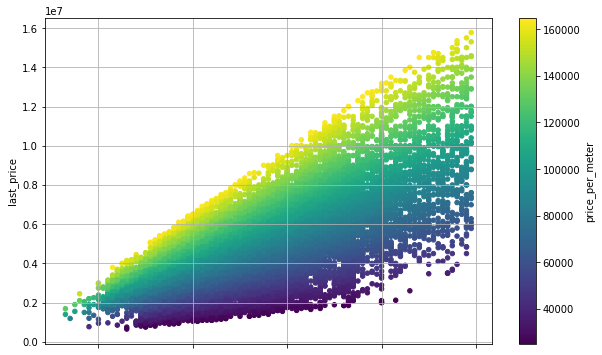

In [128]:
good_df.plot(    
    x='total_area',    
    y='last_price',   
    kind='scatter',    
    c='price_per_meter',    
    colormap='viridis',   
    grid=True, alpha=1, figsize=(10, 6)); 


In [ ]:
ValueError: Colormap spectral is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

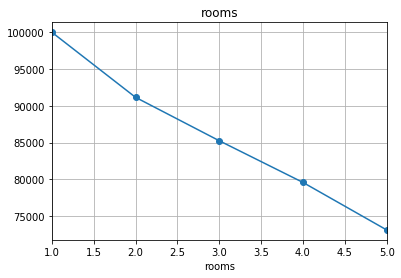

In [82]:
good_df.groupby('rooms')['price_per_meter'].median().plot(style='o-',grid=True,title='rooms');


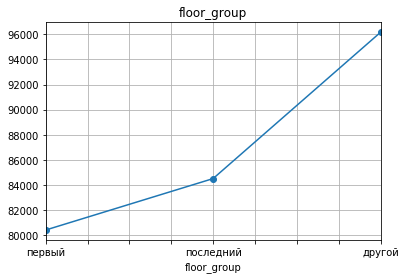

In [83]:
good_df.groupby('floor_group')['price_per_meter'].median().sort_values().plot(style='o-',grid=True,title='floor_group');

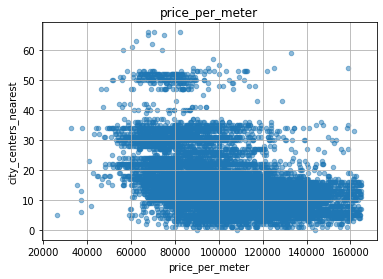

In [84]:
good_df.plot(x='price_per_meter', y='city_centers_nearest', kind='scatter', grid=True, alpha=0.5, title='price_per_meter');


Цена квартиры имеет прямую зависимость от площади.

Цена за метр, зависит от:
- количества комнат, чем комнат больше, тем цена меньше
- этажа квартиры, первый и последний этажи дешевле
- удаленности от центра, по графику видно, что по мере удаленности, цена за метр падает


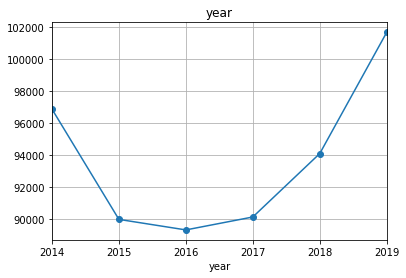

In [85]:
good_df.groupby('year')['price_per_meter'].median().plot(style='o-',grid=True,title='year');

Цена метра, падала с 14 до 16 года, затем росла, вплоть до 19 года

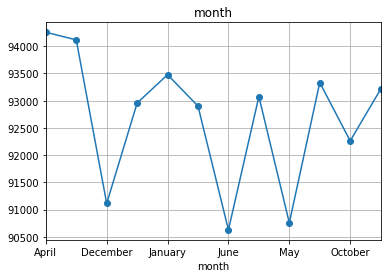

In [86]:
good_df.groupby('month')['price_per_meter'].median().plot(style='o-',grid=True,title='month');

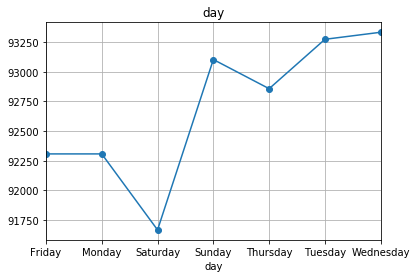

In [87]:
good_df.groupby('day')['price_per_meter'].median().plot(style='o-',grid=True,title='day');

Цена меняется в течении года и недели, неравномерно.

In [88]:
good_df_corr= good_df[['last_price', 'price_per_meter', 'total_area','city_centers_nearest', 'rooms']]

In [141]:
corr=good_df_corr.corr()

corr.style.background_gradient(cmap= 'Blues')

,last_price,price_per_meter,total_area,city_centers_nearest,rooms
last_price,1,0.639847,0.719817,-0.323123,0.437716
price_per_meter,0.639847,1,-0.028618,-0.414792,-0.205405
total_area,0.719817,-0.028618,1,-0.115327,0.794956
city_centers_nearest,-0.323123,-0.414792,-0.115327,1,-0.0710274
rooms,0.437716,-0.205405,0.794956,-0.0710274,1


Если коэффициент корреляции Пирсона стремится к 1, то прослежиается прямая зависимость, чем больше значение, тем более явная зависимость, если к к -1, то прослежиается обратная зависимость.

- Цена квартиры имее прямую заисимость от цены за метр (0.64) и от общей площади (0.72)
- В то же время цена за метр не зависит от общей площади (-0.028)
- Площадь квартиры и количесто комнат не зависит от расстояния до центра 

C:\Users\SanSanix\anaconda3\envs\praktikum\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\SanSanix\anaconda3\envs\praktikum\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


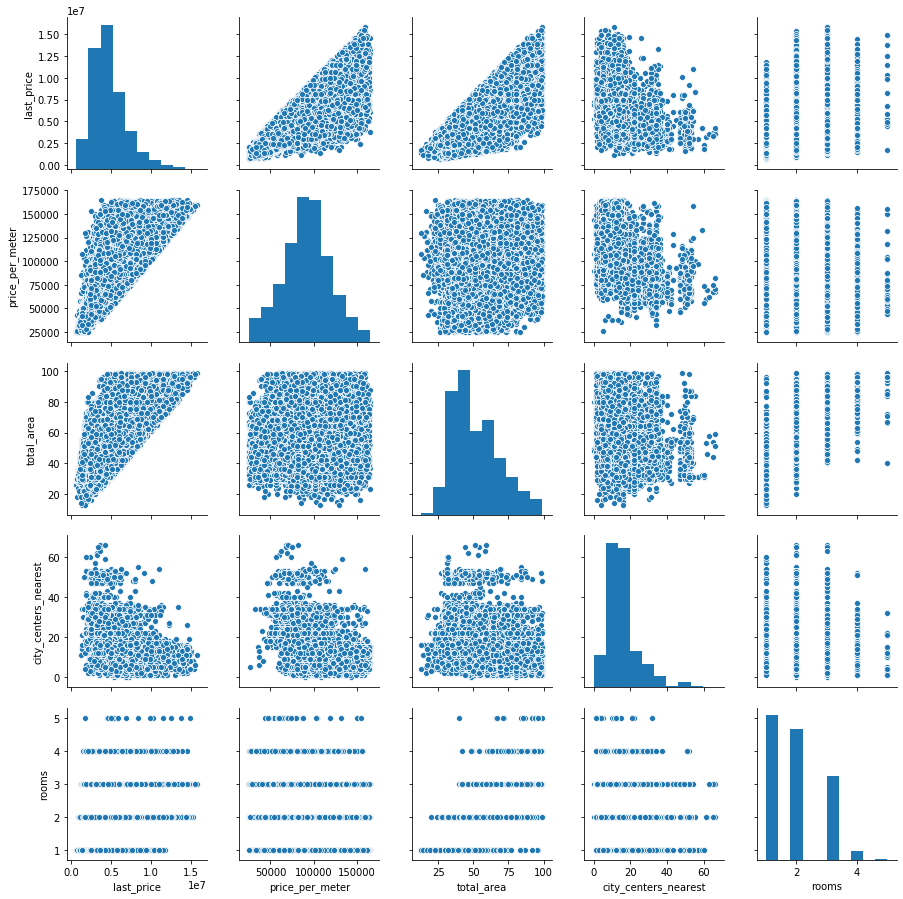

In [90]:
seaborn.pairplot(good_df_corr);

In [91]:
#pd.plotting.scatter_matrix(good_df_corr) 

### 10 населённых пунктов с наибольшим числом объявлений.

In [92]:
# выбираем города с наибольшим количеством объявлений
locality_ten = good_df['locality_name'].value_counts().head(10)
locality_ten

Санкт-Петербург      12632
поселок Мурино         554
поселок Шушары         430
Всеволожск             385
поселок Парголово      323
Колпино                323
Пушкин                 321
деревня Кудрово        297
Гатчина                294
Выборг                 208
Name: locality_name, dtype: int64

In [93]:
# Делаем выборку, согласно списку городов, группируем по городу, определяем медиану цен и сортируем
locality_ten_price = (
    good_df.query('locality_name in (@locality_ten.index)')
    .pivot_table(index='locality_name' ,values='price_per_meter', aggfunc='median')
    .sort_values('price_per_meter', ascending=False)
)

locality_ten_price

,price_per_meter
locality_name,
Санкт-Петербург,102093
Пушкин,98437
поселок Парголово,92051
деревня Кудрово,91860
поселок Мурино,85714
поселок Шушары,76939
Колпино,74722
Гатчина,67924
Всеволожск,65660


Самая высокая цена в Питере, самая низкая в Выборге

### Изучим положение квартир.

In [94]:
# Делаем выборку по питеру
(good_df.query('locality_name == "Санкт-Петербург"')
.pivot_table(index='city_centers_nearest', values='last_price',aggfunc='median'))

,last_price
city_centers_nearest,
0,6900000
1,8225000
2,7600000
3,6900000
4,6950000
5,7169260
6,6500000
7,6230000
8,5990000


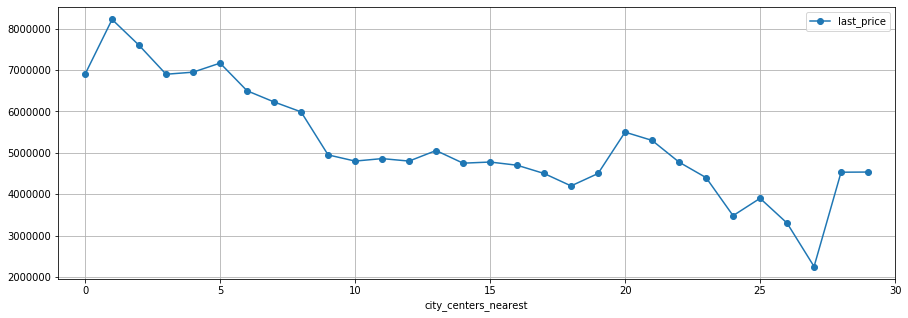

In [95]:
# Строим график цены квартиры в зависимости от удаления от центра
(good_df.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_centers_nearest', values='last_price',aggfunc='median')
    .plot(grid=True, style='o-', xlim=(-1,30), figsize=(15, 5)))


Предлагаю взять 8 км, дальше цена сильно падает, затем идет прямая, затем пригород с разным уровнем цен.

### Анализ квартир в центре

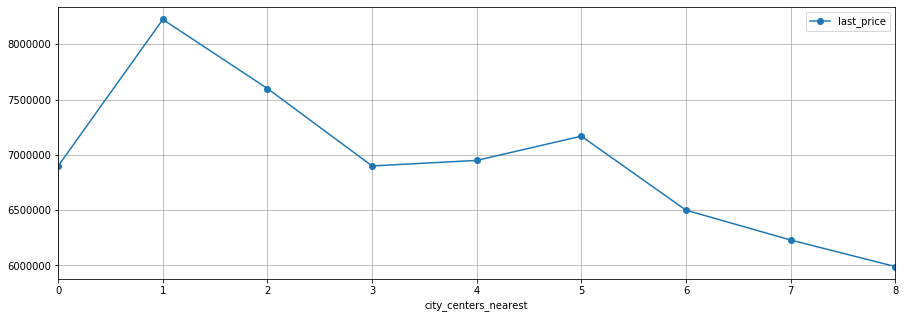

In [96]:
(good_df.query('locality_name == "Санкт-Петербург" and city_centers_nearest<=8')
    .pivot_table(index='city_centers_nearest', values='last_price',aggfunc='median')
    .plot(grid=True, style='o-', xlim=(0,8), figsize=(15, 5)))


In [97]:
good_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floor_group,living_area_ratio,kitchen_area_ratio,year,month,day,price_per_meter
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,False,False,False,11,2,поселок Шушары,13,19,0.00,NaN,0.00,NaN,81.00,первый,0.45,0.28,2018,December,Tuesday,83750
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,False,False,False,8,0,Санкт-Петербург,22,14,1.00,0,2.00,1,558.00,другой,0.61,0.14,2015,August,Thursday,92785
5,10,2890000,30,2018-09-10,1,2.65,12,14,5,False,False,False,9,0,городской поселок Янино-1,NaN,NaN,nan,NaN,nan,NaN,55.00,другой,0.47,0.30,2018,September,Monday,96333
6,6,3700000,37,2017-11-02,1,2.65,26,10,6,False,False,False,14,1,поселок Парголово,53,19,0.00,NaN,0.00,NaN,155.00,другой,0.27,0.38,2017,November,Thursday,100000
7,5,7915000,72,2019-04-18,2,2.65,24,40,22,False,False,False,18,2,Санкт-Петербург,24,12,0.00,NaN,0.00,NaN,nan,другой,0.56,0.25,2019,April,Thursday,109930


In [98]:
# Делаем выборку центральных квартир Питера
centre_stat=good_df.query('locality_name == "Санкт-Петербург" and city_centers_nearest<=8')

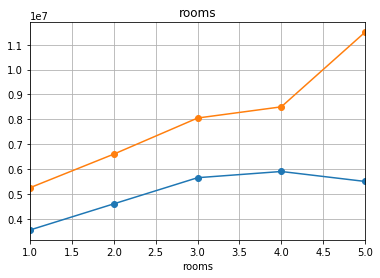

In [99]:
good_df.groupby('rooms')['last_price'].median().plot(style='o-',grid=True,title='rooms',label='raw')
centre_stat.groupby('rooms')['last_price'].median().plot(style='o-',grid=True,title='rooms',label='centre')


Цены в центре питера выше, причем, чем больше комнат, тем больше разница

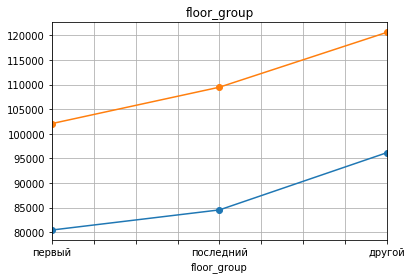

In [100]:
good_df.groupby('floor_group')['price_per_meter'].median().sort_values().plot(style='o-',grid=True,title='floor_group')
centre_stat.groupby('floor_group')['price_per_meter'].median().sort_values().plot(style='o-',grid=True,title='floor_group')

Цены за метр в зависимости от этажа, также выше в центре

In [101]:
print('Общая площадь в центре', good_df['total_area'].median())
print('Общая площадь по городу', centre_stat['total_area'].median())

Общая площадь в центре 48.0
Общая площадь по городу 60.0


Площадь квартир в центре меньше, чем по всему городу

In [102]:
print('Высота потолков в центре', good_df['ceiling_height'].median())
print('Высота потолков по городу', centre_stat['ceiling_height'].median())

Высота потолков в центре 2.65
Высота потолков по городу 2.65


Высота потолков не зависит от местоположения

#### Вывод
- Цены в центре города выше
- зависимости от этажа и количества комнат соответствуют городской
- При этом площадь самих квартир меньше
- Высота потолков в целом одинаковая


## Общий вывод

- медианное время продажи 100 дней, а основные продажи происходят от 45 до 230 дней
- Среднне время продажи 180 дней
- 73% квартир продаются в течении года
- некоторые квартиры продаются годами

- первый этаж самый дешевый, потом идет последний, самые дорогие квартиры в центре дома
- цена за метр у однушек выше, чем квартр с несколькими комнатами

- Дороже всего квадратный метр в Санкт-Петербурге - 102093
- Дешевле всего квадратный метр в Выборге - 58086

